Alice and Bob have an undirected graph of n nodes and three types of edges:

    Type 1: Can be traversed by Alice only.
    Type 2: Can be traversed by Bob only.
    Type 3: Can be traversed by both Alice and Bob.

Given an array edges where edges[i] = [typei, ui, vi] represents a bidirectional edge of type typei between nodes ui and vi, find the maximum number of edges you can remove so that after removing the edges, the graph can still be fully traversed by both Alice and Bob. The graph is fully traversed by Alice and Bob if starting from any node, they can reach all other nodes.

Return the maximum number of edges you can remove, or return -1 if Alice and Bob cannot fully traverse the graph.

 

Example 1:

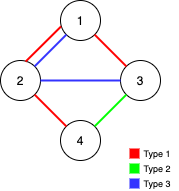

Input: n = 4, edges = [[3,1,2],[3,2,3],[1,1,3],[1,2,4],[1,1,2],[2,3,4]]
Output: 2
Explanation: If we remove the 2 edges [1,1,2] and [1,1,3]. The graph will still be fully traversable by Alice and Bob. Removing any additional edge will not make it so. So the maximum number of edges we can remove is 2.

Example 2:

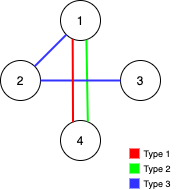

Input: n = 4, edges = [[3,1,2],[3,2,3],[1,1,4],[2,1,4]]
Output: 0
Explanation: Notice that removing any edge will not make the graph fully traversable by Alice and Bob.

Example 3:

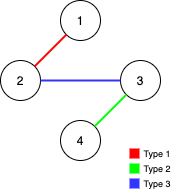

Input: n = 4, edges = [[3,2,3],[1,1,2],[2,3,4]]
Output: -1
Explanation: In the current graph, Alice cannot reach node 4 from the other nodes. Likewise, Bob cannot reach 1. Therefore it's impossible to make the graph fully traversable.

 

 

Constraints:

    1 <= n <= 105
    1 <= edges.length <= min(105, 3 * n * (n - 1) / 2)
    edges[i].length == 3
    1 <= typei <= 3
    1 <= ui < vi <= n
    All tuples (typei, ui, vi) are distinct.



In [ ]:
class DSU:
    def __init__(self, n):
        self.parent = [i for i in range(n)]
        self.rank = [0] * n
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        xset, yset = self.find(x), self.find(y)
        if xset != yset:
            if self.rank[xset] < self.rank[yset]:
                self.parent[xset] = yset
            elif self.rank[xset] > self.rank[yset]:
                self.parent[yset] = xset
            else:
                self.parent[xset] = yset
                self.rank[yset] += 1
            return True
        return False


class Solution:
    def maxNumEdgesToRemove(self, n: int, edges: List[List[int]]) -> int:
        edges.sort(reverse=True)
        dsu_alice = DSU(n+1)
        dsu_bob = DSU(n+1)
        removed_edge = 0
        alice_edges, bob_edges = 0, 0
        for edge in edges:
            if edge[0] == 3:
                if dsu_alice.union(edge[1], edge[2]):
                    dsu_bob.union(edge[1], edge[2])
                    alice_edges += 1
                    bob_edges += 1
                else:
                    removed_edge += 1
            elif edge[0] == 2:
                if dsu_bob.union(edge[1], edge[2]):
                    bob_edges += 1
                else:
                    removed_edge += 1
            else:
                if dsu_alice.union(edge[1], edge[2]):
                    alice_edges += 1
                else:
                    removed_edge += 1
        return removed_edge if bob_edges == n - 1 == alice_edges else -1